1. DIAGRAMAS DE VORONOI Y TRIANGULACIÓN DE DELAUNAY (copia del ejemplo de moodle)

Para calcular y dibujar el diagrama de Voronoi y la triangulación de Delaunay es necesario importar
de la libería scipy.spatial y de matplotlib las siguientes funciones.

In [1]:
from scipy.spatial import Delaunay,Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib as mpl

Además importaremos la librería numpy para poder generar arrays de puntos.

In [2]:
import numpy as np

El siguiente código genera aleatoriamente 10 puntos en el plano.

In [3]:
points = np.random.rand(10, 2) # 10 random points in 2-D

La siguiente expresión calcula el diagrama de Voronoi.

In [4]:
vor = Voronoi(points)

Para representarlo gráficamente:

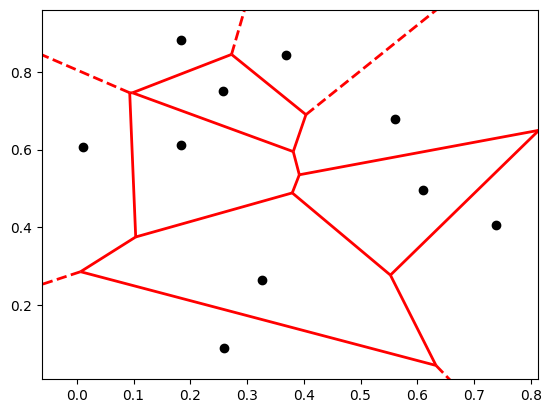

In [5]:
fig = voronoi_plot_2d(vor, show_vertices=False, line_width=2, line_colors='red')
plt.plot(points[:,0], points[:,1], 'ko')

Para calcular la triangulación de Delaunay (se une cada punto con los puntos con regiones de Voronoi adyacentes, es decir, con los que comparte una frontera).

In [6]:
Del=Delaunay(points)

El siguiente comando accede al array de símplices maximales (triángulos) de la triangulación de
Delaunay. ¡Ojo! Los vértices de los símplices no salen ordenados en orden lexicográfico

In [7]:
Del.simplices

array([[0, 4, 3],
       [4, 0, 9],
       [6, 4, 9],
       [6, 2, 4],
       [4, 2, 3],
       [2, 5, 3],
       [8, 2, 6],
       [8, 6, 9],
       [1, 8, 7],
       [8, 1, 2],
       [5, 1, 7],
       [2, 1, 5]], dtype=int32)

Para representar gráficamente la triangulación de Delaunay, imprimiendo los triangulos en color
verde y las aristas y vértices de color negro utilizamos la siguiente línea de comandos.

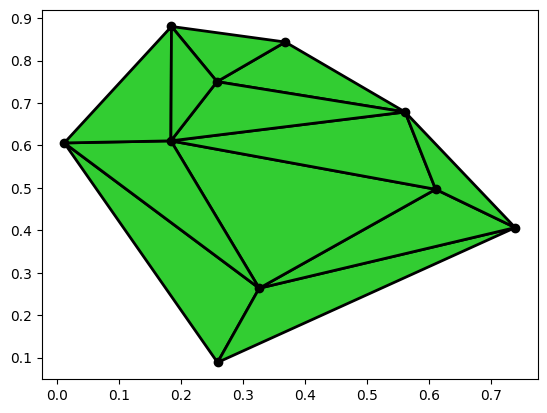

In [8]:
c=np.ones(len(points))
cmap = matplotlib.colors.ListedColormap("limegreen")
plt.tripcolor(points[:,0],points[:,1],Del.simplices, c, edgecolor="k", lw=2,cmap=cmap)
plt.plot(points[:,0], points[:,1], 'ko')
plt.show()

Si queremos representar la triangulación de Delaunay sobre el diagrama de Voronoi hacemos lo
siguiente.

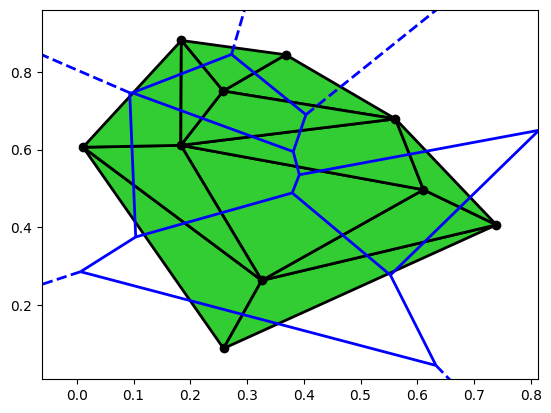

3

In [9]:
fig = voronoi_plot_2d(vor,show_vertices=False,line_width=2, line_colors='blue' )
c=np.ones(len(points))
cmap = matplotlib.colors.ListedColormap("limegreen")
plt.tripcolor(points[:,0],points[:,1],Del.simplices, c, edgecolor="k", lw=2,cmap=cmap)
plt.plot(points[:,0], points[:,1], 'ko')
plt.show()
3


Definir una función que calcule la filtración de alfa complejos asociada a un conjunto de puntos del plano.

Dado un conjunto de puntos S, se define el alfa complejo de radio r de S como el complejo simplicial abstracto formado por todos los símplices para los que todos sus puntos tienen sus Ru(r) (intersecciones de sus regiones de voronoi con la bola de centro u y radio r) con una intersección no vacía.


In [25]:
import numpy as np
from scipy.spatial import Delaunay

class AlfaComplejo:
    """
    Clase para calcular el Alfa Complejo de un conjunto de puntos en 2D.
    
    Atributos:
    - points: np.array de puntos en 2D.
    - triangulation: Triangulación de Delaunay de los puntos.
    - simplices: Lista de símplices (triángulos, aristas y puntos) de la triangulación.
    - alpha_values: Diccionario que almacena los valores de alfa para cada símplice.
    """
    
    def __init__(self, points):
        """
        Inicializa la clase con un conjunto de puntos y calcula la triangulación de Delaunay.
        
        Parámetros:
        - points: np.array de puntos en 2D.
        """
        self.points = points
        self.triangulation = Delaunay(points)
        self.simplices = self.get_all_simplices()
        self.alpha_values = self.calculate_alpha_values()

    def get_all_simplices(self):
        """
        Obtiene todos los símplices (puntos, aristas y triángulos) de la triangulación de Delaunay.
        
        Retorna:
        - Lista de símplices.
        """
        simplices = set()
        # Añadir puntos
        for i in range(len(self.points)):
            simplices.add((i,))
        # Añadir aristas y triángulos
        for simplex in self.triangulation.simplices:
            for i in range(3):
                # Añadir aristas
                simplices.add(tuple(sorted([simplex[i], simplex[(i + 1) % 3]])))
            # Añadir triángulos
            simplices.add(tuple(sorted(simplex)))
        return list(simplices)

    def calculate_alpha_values(self):
        """
        Calcula los valores de alfa para cada símplice en la triangulación de Delaunay.
        Seguimos el algoritmo dado en las diapositivas de la asignatura.
        
        Retorna:
        - alpha_values: Diccionario con los valores de alfa para cada símplice.
        """
        alpha_values = {}
        for simplex in self.simplices:
            vertices = self.points[list(simplex)]
            if len(vertices) == 3:
                # Calcular el circunradio para triángulos
                A = np.linalg.norm(vertices[1] - vertices[0])
                B = np.linalg.norm(vertices[2] - vertices[1])
                C = np.linalg.norm(vertices[0] - vertices[2])
                s = (A + B + C) / 2
                area = np.sqrt(s * (s - A) * (s - B) * (s - C))
                circumradius = (A * B * C) / (4 * area)
                alpha_values[tuple(simplex)] = circumradius
            elif len(vertices) == 2:
                # Calcular el radio para aristas
                edge_length = np.linalg.norm(vertices[1] - vertices[0])
                alpha_values[tuple(simplex)] = edge_length / 2
            elif len(vertices) == 1:
                # Los puntos siempre pertenecen al Alfa Complejo
                alpha_values[tuple(simplex)] = 0
        return alpha_values

    def filtrationorder(self):
        """
        Ordena los símplices por el valor de alfa en el que aparecen.
        
        Retorna:
        - Lista de tuplas (símplice, valor de alfa) ordenadas por el valor de alfa.
        """
        return sorted(self.alpha_values.items(), key=lambda item: item[1])

    def thresholdvalues(self):
        """
        Obtiene los valores de umbral de alfa para los que aparecen nuevos símplices.
        
        Retorna:
        - Lista de valores de alfa únicos ordenados.
        """
        return sorted(set(self.alpha_values.values()))



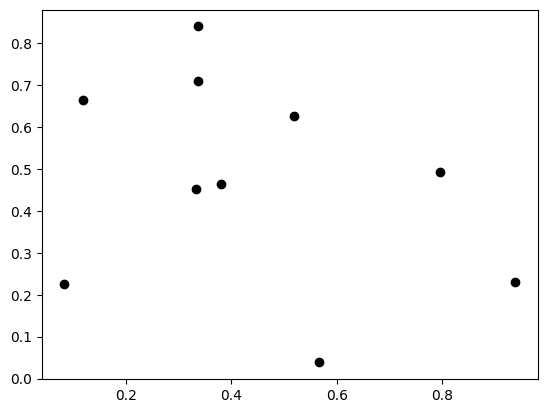

In [26]:
points=np.array([(0.38021546727456423, 0.46419202339598786), (0.7951628297672293, 0.49263630135869474), (0.566623772375203, 0.038325621649018426), (0.3369306814864865, 0.7103735061134965), (0.08272837815822842, 0.2263273314352896), (0.5180166301873989, 0.6271769943824689), (0.33691411899985035, 0.8402045183219995), (0.33244488399729255, 0.4524636520475205), (0.11778991601260325, 0.6657734204021165), (0.9384303415747769, 0.2313873874340855)])
plt.plot(points[:,0],points[:,1],'ko')
plt.show()

In [27]:
alpha = AlfaComplejo(points)

In [28]:
alpha.filtrationorder()

[((2,), 0),
 ((5,), 0),
 ((8,), 0),
 ((4,), 0),
 ((1,), 0),
 ((7,), 0),
 ((0,), 0),
 ((3,), 0),
 ((9,), 0),
 ((6,), 0),
 ((0, 7), 0.024594630110749274),
 ((3, 6), 0.06491550663246884),
 ((3, 5), 0.09964158316325628),
 ((0, 5), 0.1067160499498478),
 ((3, 8), 0.11181663867459748),
 ((0, 3), 0.12497889333174499),
 ((3, 7), 0.12897443080262758),
 ((0, 3, 7), 0.1292619191823917),
 ((0, 3, 5), 0.129720050879878),
 ((5, 6), 0.13980240119025444),
 ((6, 8), 0.14003715958303004),
 ((3, 6, 8), 0.14290429288721868),
 ((1, 9), 0.14897699064479192),
 ((7, 8), 0.151309131049649),
 ((3, 5, 6), 0.15386007896068227),
 ((1, 5), 0.15403831830169779),
 ((3, 7, 8), 0.1549830251271105),
 ((4, 7), 0.16844581383081997),
 ((0, 1), 0.20796056752930286),
 ((2, 9), 0.20947134070559964),
 ((0, 1, 5), 0.21462894097728322),
 ((4, 8), 0.22042128784724613),
 ((4, 7, 8), 0.2207272203518558),
 ((0, 2), 0.23243829737556373),
 ((2, 7), 0.23788130442736796),
 ((0, 2, 7), 0.24143718415372636),
 ((1, 2), 0.25427755231828075),

In [29]:
alpha.thresholdvalues()

[0,
 0.024594630110749274,
 0.06491550663246884,
 0.09964158316325628,
 0.1067160499498478,
 0.11181663867459748,
 0.12497889333174499,
 0.12897443080262758,
 0.1292619191823917,
 0.129720050879878,
 0.13980240119025444,
 0.14003715958303004,
 0.14290429288721868,
 0.14897699064479192,
 0.151309131049649,
 0.15386007896068227,
 0.15403831830169779,
 0.1549830251271105,
 0.16844581383081997,
 0.20796056752930286,
 0.20947134070559964,
 0.21462894097728322,
 0.22042128784724613,
 0.2207272203518558,
 0.23243829737556373,
 0.23788130442736796,
 0.24143718415372636,
 0.25427755231828075,
 0.25434295608514496,
 0.259566655903143,
 0.2660519202667225,
 0.27011640994552005,
 0.2875741410328021,
 0.7144105889522725]

Definir una función que represente gráficamente dicho alfa complejo.


Definir una función que calcule la filtración de complejos de Vietoris-Rips asociada a un conjunto de puntos.